In [1]:
#Imports
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Read data from csv stored on Github
rawData = pd.read_csv('https://raw.githubusercontent.com/EoinGohery/LinearRegression/main/kc_house_data.csv', engine='python', error_bad_lines=False, sep=',')
rawData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Remove unwanted values
rawData = rawData.drop(columns=["id","date","zipcode","lat","long","yr_renovated","sqft_living15", "sqft_lot15"])
rawData

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004


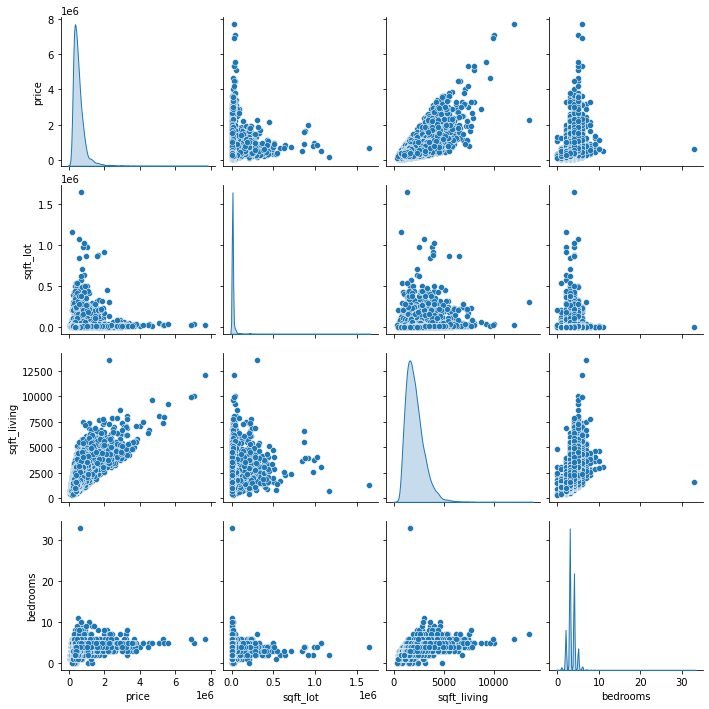

In [4]:
#Visualise rawData
sns.pairplot(rawData[['price', 'sqft_lot' , 'sqft_living', 'bedrooms']], diag_kind='kde')

In [5]:
#Prepare the input X and Output Y values
X = rawData.iloc[:,0:12].values
Y = rawData.iloc[:,0].values

In [6]:
#Normalise the input values within 0-1 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.01926557, 0.09090909, 0.125     , ..., 0.5       , 0.09758772,
        0.        ],
       [0.06072131, 0.09090909, 0.28125   , ..., 0.5       , 0.20614035,
        0.08298755],
       [0.01377049, 0.06060606, 0.125     , ..., 0.41666667, 0.05263158,
        0.        ],
       ...,
       [0.04289849, 0.06060606, 0.09375   , ..., 0.5       , 0.08004386,
        0.        ],
       [0.04262295, 0.09090909, 0.3125    , ..., 0.58333333, 0.14364035,
        0.        ],
       [0.03278689, 0.06060606, 0.09375   , ..., 0.5       , 0.08004386,
        0.        ]])

In [7]:
#Remove comment from next line to use output normalisation
#Y = np.interp(Y, (Y.min(), Y.max()), (0, +1))

In [8]:
#Split the values into Trainind Data, Test Data and Validation Data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(15129, 12) (3242, 12) (3242, 12) (15129,) (3242,) (3242,)


In [9]:
#Model Setup
model = Sequential([
    Dense(64, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])
model.compile(optimizer="adam",loss='mean_squared_logarithmic_error', metrics=['mse'])

#Run Training 
hist = model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_val, Y_val), verbose=1)

Epoch 1/50
473/473 [==============================] - 1s 2ms/step - loss: 95.4283 - mse: 419489972224.0000 - val_loss: 61.4036 - val_mse: 417782071296.0000
Epoch 2/50
473/473 [==============================] - 1s 1ms/step - loss: 50.3383 - mse: 419062775808.0000 - val_loss: 42.2808 - val_mse: 417167081472.0000
Epoch 3/50
473/473 [==============================] - 1s 1ms/step - loss: 37.2975 - mse: 418280013824.0000 - val_loss: 33.0208 - val_mse: 416221855744.0000
Epoch 4/50
473/473 [==============================] - 1s 1ms/step - loss: 29.8485 - mse: 417146175488.0000 - val_loss: 26.9642 - val_mse: 414902976512.0000
Epoch 5/50
473/473 [==============================] - 1s 1ms/step - loss: 24.6599 - mse: 415595823104.0000 - val_loss: 22.4945 - val_mse: 413140287488.0000
Epoch 6/50
473/473 [==============================] - 1s 1ms/step - loss: 20.6892 - mse: 413563682816.0000 - val_loss: 18.9587 - val_mse: 410830602240.0000
Epoch 7/50
473/473 [==============================] - 1s 1ms/ste

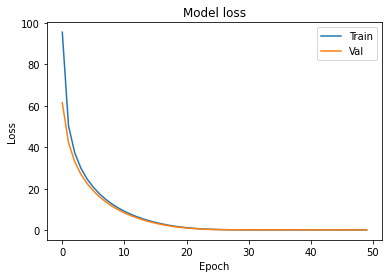

In [10]:
#Plot Loss Graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

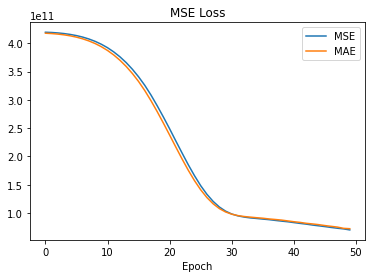

In [11]:
#Plot Alternate Loss Graph (MSE)
plt.title('MSE Loss')
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.xlabel('Epoch')
plt.legend(['MSE', 'MAE'], loc='upper right')
plt.show()